# Basketball Team Analysis - Rough Work

In [130]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [131]:
%matplotlib inline
sns.set(color_codes=True)

### 1. Lets first read the data and analyse the data

In [105]:
bbData = pd.read_csv("Basketball.csv");

In [98]:
bbData.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [99]:
bbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [100]:
bbData.shape

(61, 13)

**Observations**

1. There are a total of 61 rows and 13 features
2. All features seem important for the analysis and none of the columns give redundant data
3. Only the Team column is supposed to be String, TeamLaunched should be year-data and all remaining should have been numerical data. However, current dataset are all object types and would need conversion
4. The TeamLaunched column has a non-standardised data. Would need to convert to a standardised form.
5. Many of the columns have empty rows, which mean 0. So will replace the - (dashed) symbols with 0


In [4]:
bbData['Team'].nunique()

61

There are 61 teams

## 1.1 Cleanup Data

1. Convert to appropriate data-type

In [101]:
# first use to_numeric to convert to float and Nan -> use fillna(0) to replace NaN with 0  -> convert every required cols to int
#bbData = bbData[["Tournament","Score","PlayedGames","WonGames","DrawnGames","LostGames","BasketScored","BasketGiven","TournamentChampion","Runner-up","HighestPositionHeld"]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [114]:
def cleanDate(date):
    match = re.search("\d{4}", date)
    return match.group(0)

In [115]:
cols = bbData.columns.drop('Team').drop('TeamLaunch')
print(cols)

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'HighestPositionHeld'],
      dtype='object')


In [116]:
bbData[cols] = bbData[cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [117]:
bbData['TeamLaunch'] = bbData['TeamLaunch'].apply(cleanDate)
bbData['Team'] = bbData['Team'].astype("category")
bbData['TeamLaunch'] = bbData['TeamLaunch'].astype(int)

In [118]:
bbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Team                 61 non-null     category
 1   Tournament           61 non-null     int32   
 2   Score                61 non-null     int32   
 3   PlayedGames          61 non-null     int32   
 4   WonGames             61 non-null     int32   
 5   DrawnGames           61 non-null     int32   
 6   LostGames            61 non-null     int32   
 7   BasketScored         61 non-null     int32   
 8   BasketGiven          61 non-null     int32   
 9   TournamentChampion   61 non-null     int32   
 10  Runner-up            61 non-null     int32   
 11  TeamLaunch           61 non-null     int32   
 12  HighestPositionHeld  61 non-null     int32   
dtypes: category(1), int32(12)
memory usage: 6.0 KB


In [119]:
bbData.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000


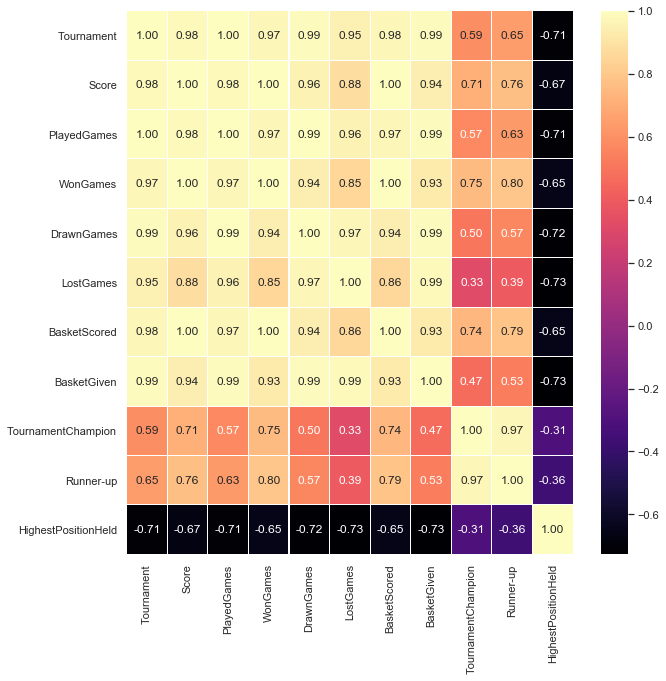

In [132]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(bbData[cols].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

## Analysis Data

In [121]:
bbData.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


**Quick Stats**

In [83]:
bbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int32 
 2   Score                61 non-null     int32 
 3   PlayedGames          61 non-null     int32 
 4   WonGames             61 non-null     int32 
 5   DrawnGames           61 non-null     int32 
 6   LostGames            61 non-null     int32 
 7   BasketScored         61 non-null     int32 
 8   BasketGiven          61 non-null     int32 
 9   TournamentChampion   61 non-null     int32 
 10  Runner-up            61 non-null     int32 
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int32 
dtypes: int32(11), object(2)
memory usage: 3.7+ KB


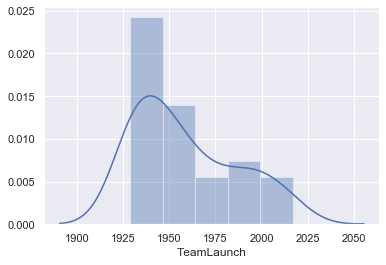

In [128]:
sns.distplot(bbData['TeamLaunch']);

In [1]:
bbData['winPercent'] = (bbData['WonGames']/(bbData['LostGames']+bbData['DrawnGames']+bbData['LostGames']))*100

NameError: name 'bbData' is not defined

In [143]:
x = bbData.index[bbData['TeamLaunch'] < 1975].tolist()

In [145]:
b1975 = bbData.iloc[x]

In [148]:
b1975['WonGames'].median()

203.0

In [144]:
bbData['Tournament'].median()

TypeError: list indices must be integers or slices, not str

In [141]:
bbData.iloc[x]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2
22,Team 23,17,662,652,189,148,305,760,1088,0,0,1977,8
24,Team 25,12,553,456,147,112,197,520,633,0,0,2004,6
32,Team 33,12,343,448,104,127,217,393,662,0,0,1977,12
33,Team 34,9,293,346,96,92,158,291,489,0,0,1987,7
35,Team 36,7,277,270,76,76,118,320,410,0,0,1991,7
36,Team 37,6,242,228,62,56,110,244,366,0,0,2007,8
38,Team 39,4,190,160,52,45,63,199,241,0,0,1994,10
39,Team 40,5,188,186,50,46,90,202,296,0,0,1978,8
42,Team 43,4,148,152,37,37,78,155,253,0,0,1999,17


In [ ]:
# get all columns with a correlation factor between 0.7 and 0.95
corr = bbData.corr().abs()
upperHalf = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#print(upperHalf)
#dropany corr greater than 0.95
to_drop = [column for column in upperHalf.columns if any(upperHalf[column] > 0.95)]
print(to_drop)
#newDF = bbData.drop(bbData.columns[to_drop], axis=1)figure = plt.figure(figsize=(15,10))